<a href="https://colab.research.google.com/github/delacruzsebastian-cpu/IA/blob/main/Tarea5IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Semana 5

#SEBASTIAN DE LA CRUZ GUTIERREZ PUJ



**1. Averiguar qué es es el "coefficient of determination".**

El coeficiente de determinación  es una métrica estadistica la cual determina el nivel de similitud entre los datos y la regresión realizada, esta métrica es comúnmente usada para regresiónes lineales pero se puede extrapolar a regresiónes no multiples.

**2. Intervalo de valores que toma y explicarlos.**   
el coeficiente de determinación esta dado por el coeficiente de Pearson que toma valores continuos entre -1 y 1 y en el caso de realizar la metrica al cuadrado (R^2) solo es entre 0 a 1. 

**3. Qué significa si da negativo o cero? puede pasar? antes de elevar por supuesto.**

  *   si R=1 la regresion es perfecta, esta explica todos los datos, en el caso contrario si R=-1 la regresion es negativa perfecta, la regresion explica los datos exactamente de forma inversa, si estos disminuyen en cierta medida la regrasión aumenta en esa medida exacta y visceversa
  *   si R=0 no existe relación entre los datos y la regresion, esta no explica ningun dato.
  *   si 0>r>1 la regresion explica cierta parte de los datos en cierta medida positiva por el contrario si 0>r>-1 es el inverso.


## R^2 de los datos de voltaje vs corriente

In [13]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set_theme(color_codes=True)

def reg(x,y): #regresion 

  X = np.matrix(x).T
  Y = np.matrix([y]).T
  theta = np.linalg.inv(X.T*X)*(X.T)*Y

  return theta

#voltaje
x1 = np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6])
x0=np.ones(x1.shape)
#corriente
y = np.array([0.169610272,0.283395813,0.386358738,0.470227872 
                      ,0.433281294,0.600267648,0.73833898,0.79031502
                      ,0.877464268,0.843564462,0.964438817]) 

param = reg([x0,x1],y)
print("por la solucion por el metodo de la pseudoinversa de moon-penrose los parametros fueron  = ", param)

#R^2
y_pred = param[0,0] + param[1,0]*x1
R = metrics.r2_score(y, y_pred)
print("el coeficiente de determinacion es: ",R)

por la solucion por el metodo de la pseudoinversa de moon-penrose los parametros fueron  =  [[0.04671882]
 [0.15697029]]
el coeficiente de determinacion es:  0.967891304372684


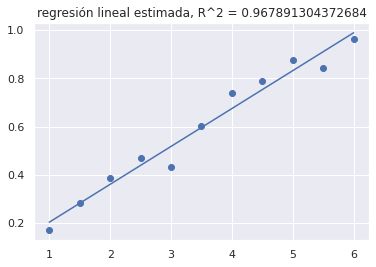

In [15]:
plt.plot(x1, y, 'bo')
plt.plot(x1,param[0,0] + param[1,0]*x1)
plt.title("regresión lineal estimada, R^2 = {}".format(R))
plt.show()

## Vacunación covid en Colombia 

In [ ]:
data = pd.read_csv("country_vaccinations.csv")
data.filter(["iso_code", "date", "total_vaccinations", "people_vaccinated","daily_vaccinations"])
data_col =data[data['iso_code']=='COL'].copy()

data_col



,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1231,Colombia,COL,2021-02-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1232,Colombia,COL,2021-02-17,18.0,18.0,NaN,18.0,18.0,0.00,0.00,NaN,0.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1233,Colombia,COL,2021-02-18,7854.0,7854.0,NaN,7836.0,3927.0,0.02,0.02,NaN,77.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1234,Colombia,COL,2021-02-19,21307.0,21307.0,NaN,13453.0,7102.0,0.04,0.04,NaN,140.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1235,Colombia,COL,2021-02-20,33140.0,33140.0,NaN,11833.0,8285.0,0.07,0.07,NaN,163.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1236,Colombia,COL,2021-02-21,39827.0,39827.0,NaN,6687.0,7965.0,0.08,0.08,NaN,157.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1237,Colombia,COL,2021-02-22,45166.0,45166.0,NaN,5339.0,7528.0,0.09,0.09,NaN,148.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1238,Colombia,COL,2021-02-23,48150.0,48150.0,NaN,2984.0,6879.0,0.09,0.09,NaN,135.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1239,Colombia,COL,2021-02-24,50524.0,50524.0,NaN,2374.0,7215.0,0.10,0.10,NaN,142.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...
1240,Colombia,COL,2021-02-25,66157.0,66157.0,NaN,15633.0,8329.0,0.13,0.13,NaN,164.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://www.minsalud.gov.co/salud/publica/Vacu...


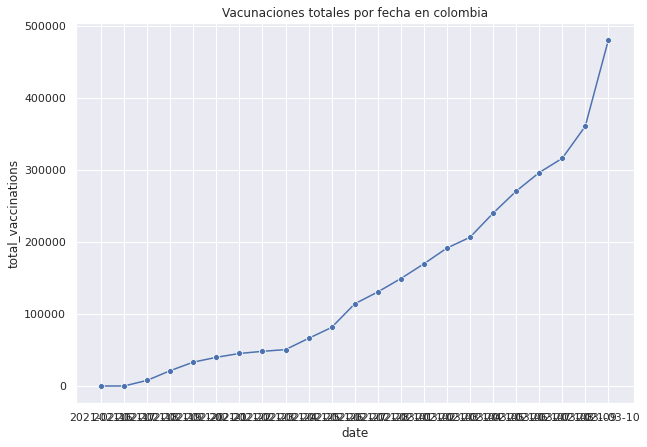

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data_col,x="date",y="total_vaccinations",marker='o')
plt.title("Vacunaciones totales por fecha en colombia")
plt.show()

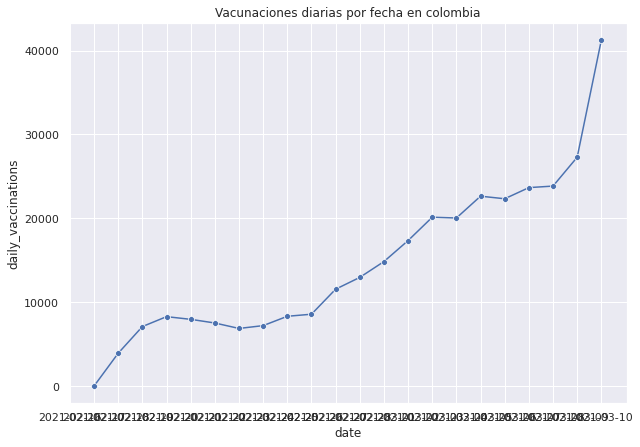

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data_col,x="date",y="daily_vaccinations",marker='o')
plt.title("Vacunaciones diarias por fecha en colombia")
plt.show()

In [ ]:
# REGRECION LINEAL
y = data_col["total_vaccinations"].values 
x0 = np.ones(y.shape)
x1 = np.array([i+1  for i in range(len(y))])
param = reg([x0,x1],y)
print("por la solucion por el metodo de la pseudoinversa de moon-penrose los parametros fueron  = ", param)

#R^2
y_pred = param[0,0] + param[1,0]*x1
R = metrics.r2_score(y, y_pred)
print("el coeficiente de determinacion es: ",R)

solucion por el metodo de la pseudoinversa de moon-penrose, parametros =  [[-77179.57312253]
 [ 18454.34486166]]  para regresion de primero orden
el coeficiente de determinacion R^2 es:  0.9028288182347985


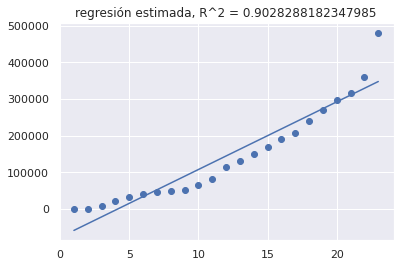

In [ ]:
plt.plot(x1, y, 'bo')
plt.plot(x1,y_pred)
plt.title("regresión lineal estimada, R^2 = {}".format(R2))
plt.show()

In [ ]:
# REGRECION POLINOMIAL DE SEGUNDO ORDEN 
x2 = np.array(np.power(x1,2)) # y = a + b*x +c*x^2 

param = reg([x0,x1],y)
print("por la solucion por el metodo de la pseudoinversa de moon-penrose los parametros fueron  = ", param)

#R^2
y_pred = param[0,0] + param[1,0]*x1
R = metrics.r2_score(y, y_pred)
print("el coeficiente de determinacion es: ",R)

solucion por el metodo de la pseudoinversa de moon-penrose, parametros =  [[15579.22134387]
 [-3807.76581028]
 [  927.58794466]]  para la regresión de segundo orden
el coeficiente de determinacion R^2 es:  0.9826625415989749


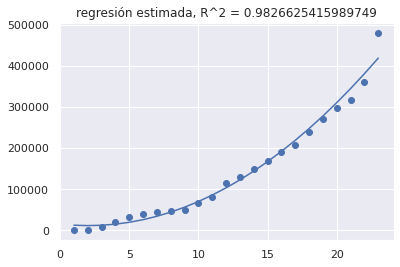

In [ ]:
plt.plot(x1, y, 'bo')
plt.plot(x1,y_pred1)
plt.title("regresión estimada, R^2 = {}".format(R2))
plt.show()

## Conclusión

*  En esta tarea logre aprendet que conociendo el coeficiente de determinación de cada regresión se puede comparar el desempeño de las regreciones en este caso luego de hacer las regreciones se obtuvo que dado el coeficiente de determinación la regreción polinomica se adapto mejor, y por esto siguiendo la regrencion se podra estimar el avance en la vacunación en Colombia       